In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import datetime
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date",parse_dates=True)
dataset.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0,0,0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0,0,0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0,0,0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0,0,0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0,0,0


In [ ]:
dataset.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-12-23,790.90,792.74,787.28,789.91,623400.0,0,0
2016-12-27,790.68,797.86,787.66,791.55,789100.0,0,0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0,0,0
2016-12-29,783.33,785.93,778.92,782.79,744300.0,0,0
2016-12-30,782.75,782.78,770.41,771.82,1770000.0,0,0


In [ ]:
dataset.shape

(1258, 7)

In [ ]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06,0.0,0.0
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06,0.0,0.0
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03,0.0,0.0
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06,0.0,0.0
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06,0.0,0.0
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06,0.0,0.0
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07,0.0,0.0


In [ ]:
dataset.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [ ]:
dataset.isna().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1258 non-null   float64
 1   High          1258 non-null   float64
 2   Low           1258 non-null   float64
 3   Close         1258 non-null   float64
 4   Volume        1258 non-null   float64
 5   Dividends     1258 non-null   int64  
 6   Stock Splits  1258 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 78.6 KB


In [ ]:
if os.path.exists("Google_Stock_Price_Train.csv"):
    Google_Stock_Price_Train = pd.read_csv("Google_Stock_Price_Train.csv", index_col=0)
else:
    Google_Stock_Price_Train = yf.Ticker("^GSPC")
    Google_Stock_Price_Train = Google_Stock_Price_Train.history(period="max")
    Google_Stock_Price_Train.to_csv("Google_Stock_Price_Train.csv")
Google_Stock_Price_Train.index = pd.to_datetime(Google_Stock_Price_Train.index)
Google_Stock_Price_Train

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0,0,0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0,0,0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0,0,0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0,0,0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0,0,0
...,...,...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400.0,0,0
2016-12-27,790.68,797.86,787.66,791.55,789100.0,0,0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0,0,0


<Axes: xlabel='Date'>

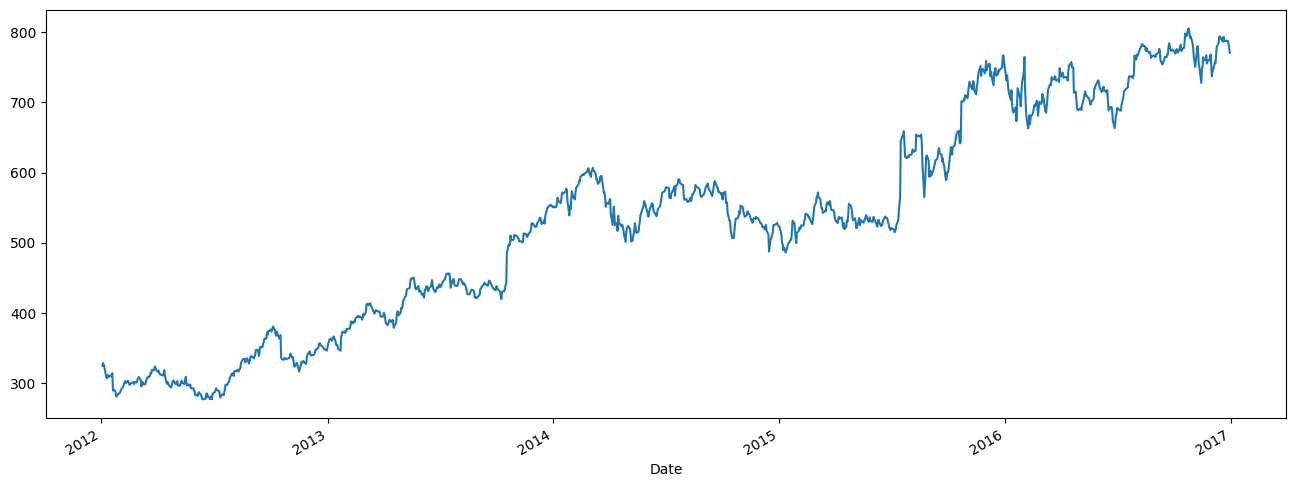

In [ ]:
dataset['Low'].plot(figsize=(16,6))

<Axes: xlabel='Date'>

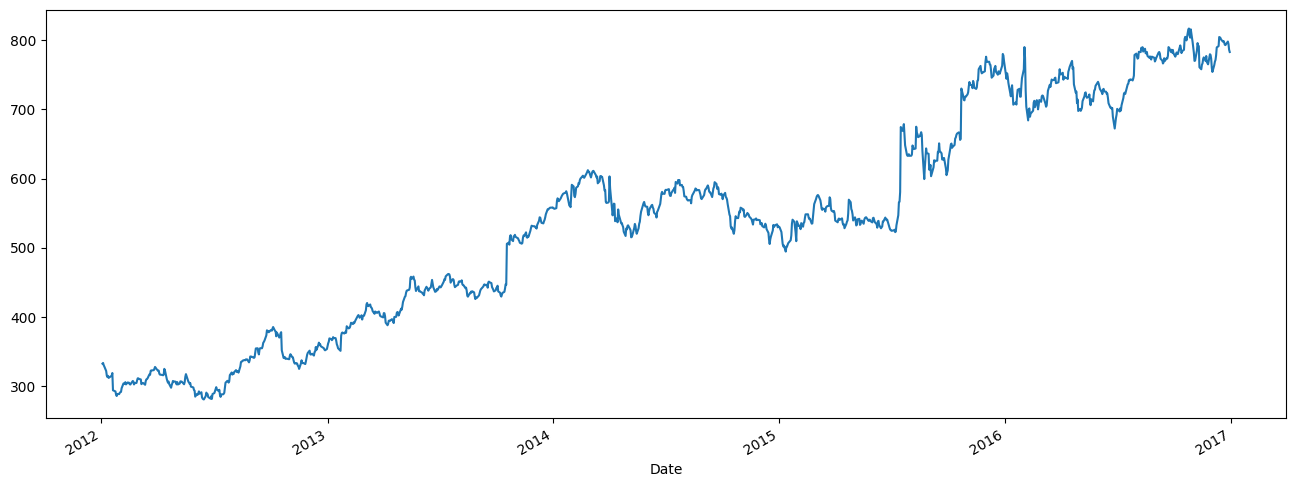

In [ ]:
dataset['High'].plot(figsize=(16,6))

<Axes: xlabel='Date'>

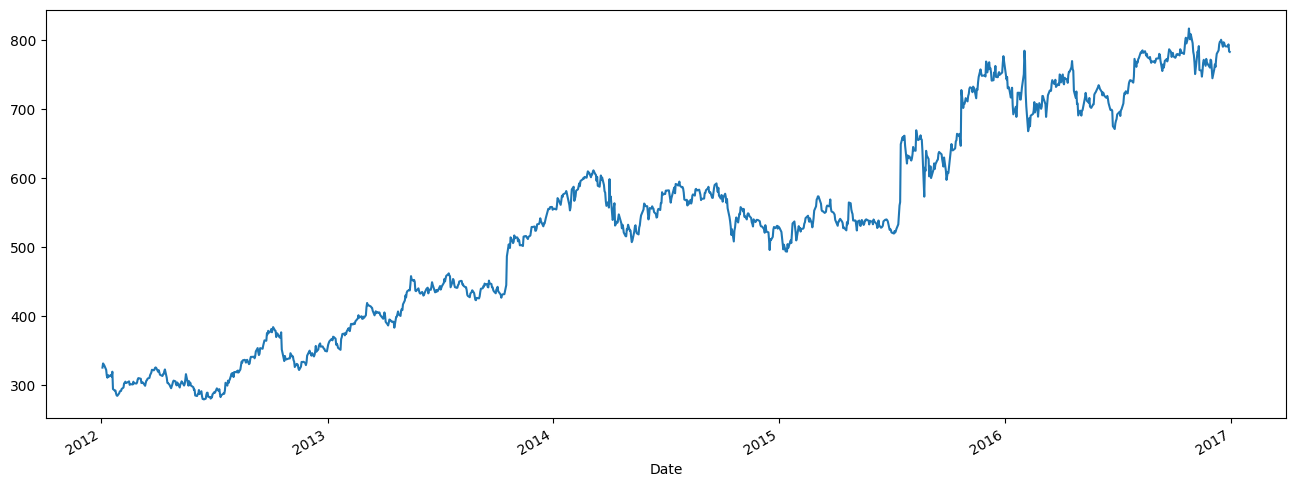

In [ ]:
dataset['Open'].plot(figsize=(16,6))

In [ ]:
dataset["Close"] = dataset["Close"].replace(',', '').astype(float)
dataset["Volume"] = dataset["Volume"].replace(',', '').astype(float)
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06,0.0,0.0
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06,0.0,0.0
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06,0.0,0.0


<Axes: xlabel='Date'>

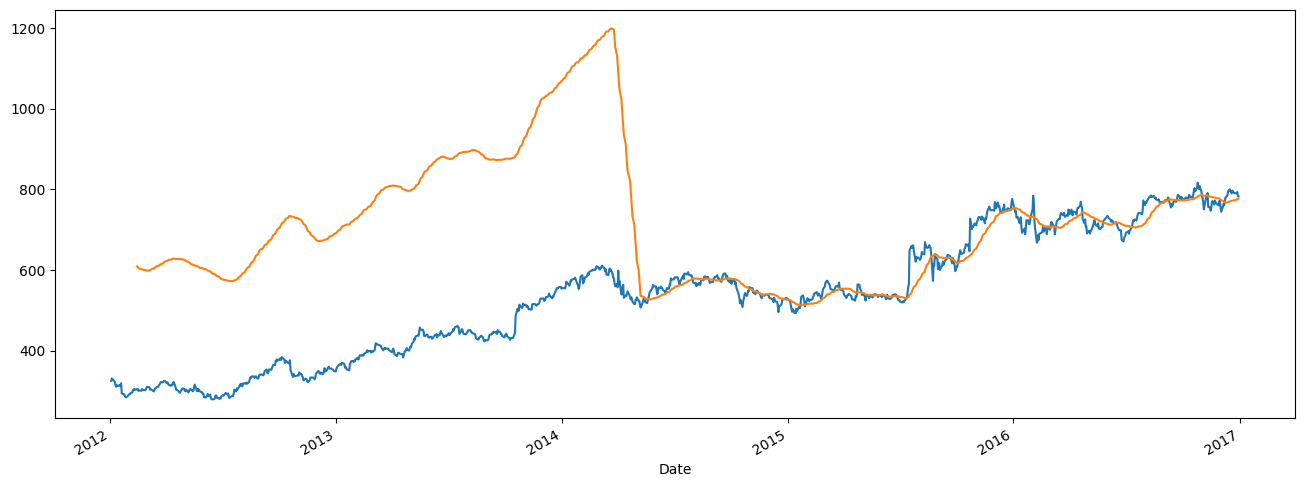

In [ ]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<Axes: xlabel='Date'>

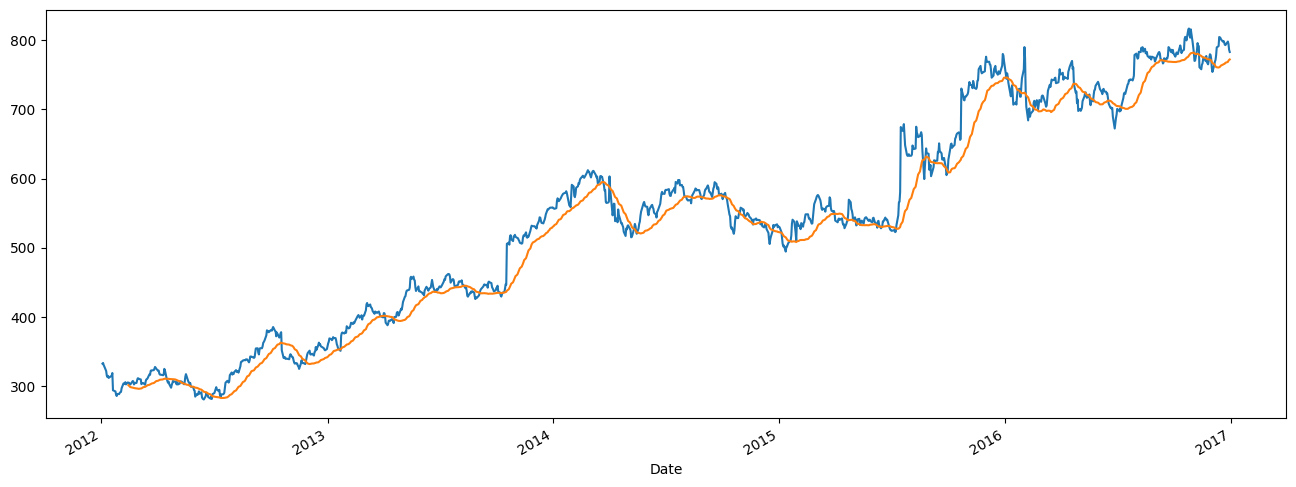

In [ ]:
dataset['High'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Low'].plot()

<Axes: xlabel='Date'>

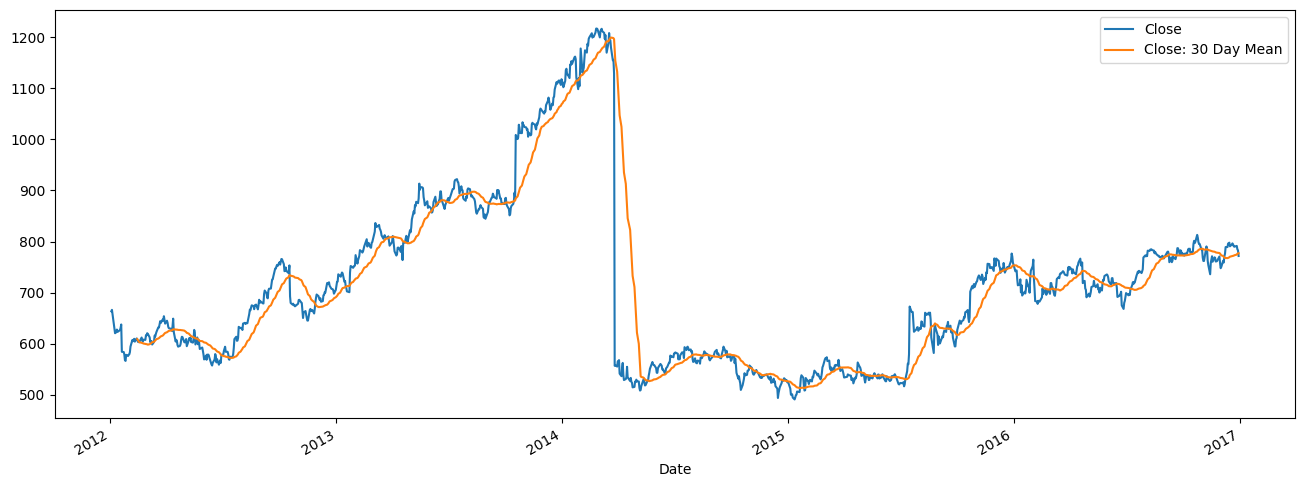

In [ ]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

<Axes: xlabel='Date'>

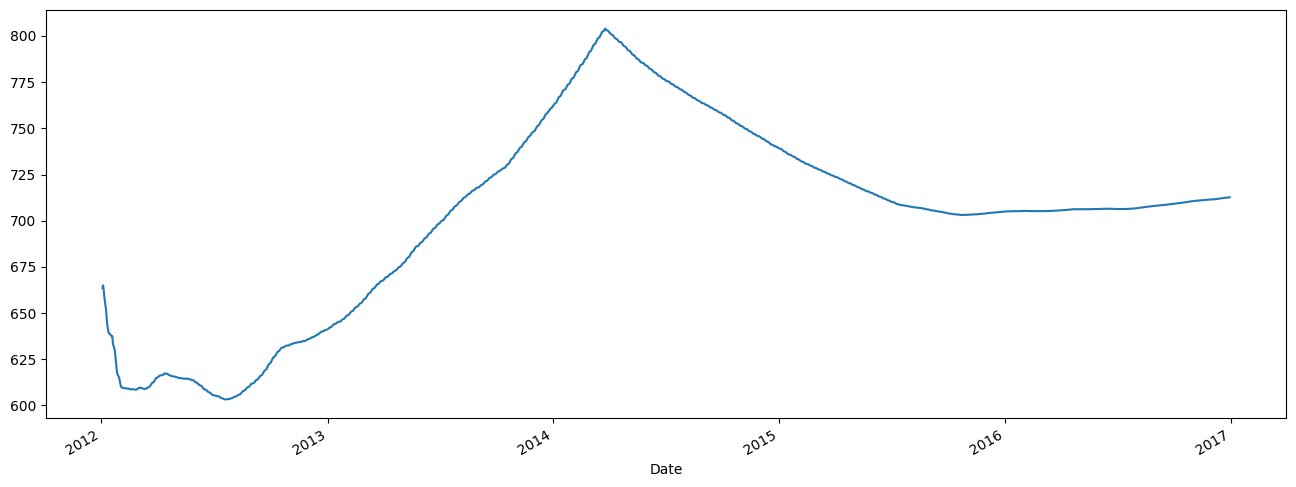

In [ ]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,778.81,789.63,775.80,786.14,1657300.0,0,0
2017-01-04,788.36,791.34,783.16,786.90,1073000.0,0,0
2017-01-05,786.08,794.48,785.02,794.02,1335200.0,0,0
2017-01-06,795.26,807.90,792.20,806.15,1640200.0,0,0
2017-01-09,806.40,809.97,802.83,806.65,1272400.0,0,0


In [ ]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 131ms/step - loss: 0.0406
Epoch 2/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0055
Epoch 3/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0050
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0045
Epoch 13/100
38

In [ ]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 2s 2s/step
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


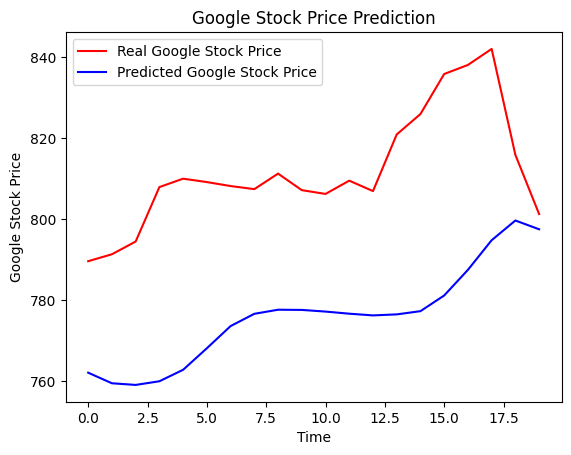

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
if os.path.exists("Google_Stock_Price_Train.csv"):
    Google_Stock_Price_Train = pd.read_csv("Google_Stock_Price_Train.csv", index_col=0)
else:
    Google_Stock_Price_Train = yf.Ticker("^GSPC")
    Google_Stock_Price_Train = Google_Stock_Price_Train.history(period="max")
    Google_Stock_Price_Train.to_csv("Google_Stock_Price_Train.csv")
Google_Stock_Price_Train.index = pd.to_datetime(Google_Stock_Price_Train.index)
Google_Stock_Price_Train

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0,0,0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0,0,0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0,0,0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0,0,0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0,0,0
...,...,...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400.0,0,0
2016-12-27,790.68,797.86,787.66,791.55,789100.0,0,0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0,0,0


In [ ]:
del Google_Stock_Price_Train["Dividends"]
del Google_Stock_Price_Train["Stock Splits"]
Google_Stock_Price_Train["Tomorrow"] = Google_Stock_Price_Train["Close"].shift(-1)
Google_Stock_Price_Train["Target"] = (Google_Stock_Price_Train["Tomorrow"] > Google_Stock_Price_Train["Close"]).astype(int)

In [ ]:
Google_Stock_Price_Train = Google_Stock_Price_Train.loc["2012-01-03":].copy()

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = Google_Stock_Price_Train.iloc[:-100]
test = Google_Stock_Price_Train.iloc[-100:]

In [ ]:
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

1.0

<Axes: xlabel='Date'>

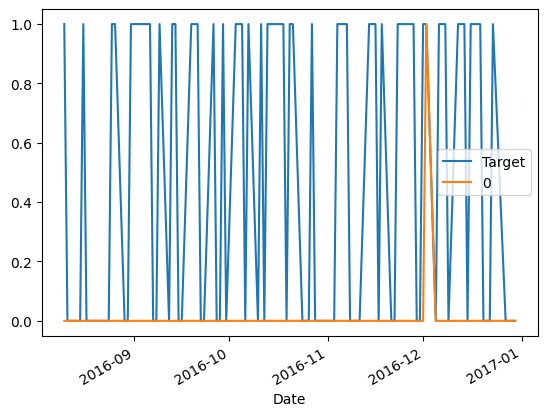

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = Google_Stock_Price_Train.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    Google_Stock_Price_Train[ratio_column] = Google_Stock_Price_Train["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    Google_Stock_Price_Train[trend_column] = Google_Stock_Price_Train.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = Google_Stock_Price_Train.dropna(subset=Google_Stock_Price_Train.columns[Google_Stock_Price_Train.columns != "Tomorrow"])
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2015-12-23,753.47,754.21,744.00,750.31,1565900.0,748.40,0,1.000207,2.0,1.003942,3.0,1.053914,34.0,1.254944,125.0,1.064724,506.0
2015-12-24,749.55,751.35,746.62,748.40,527200.0,762.51,1,0.998726,1.0,1.001662,3.0,1.047797,33.0,1.249914,125.0,1.061891,505.0
2015-12-28,752.92,762.99,749.52,762.51,1515300.0,776.60,1,1.009339,1.0,1.014249,4.0,1.063798,33.0,1.271495,125.0,1.081749,506.0
2015-12-29,766.69,779.98,766.43,776.60,1765000.0,771.00,0,1.009155,2.0,1.025128,4.0,1.079698,33.0,1.292821,126.0,1.101538,507.0
2015-12-30,776.60,777.60,766.90,771.00,1293300.0,758.88,0,0.996381,1.0,1.012124,3.0,1.068704,32.0,1.281385,126.0,1.093362,507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400.0,791.55,1,0.999146,0.0,0.995764,2.0,1.014253,32.0,1.063094,130.0,1.081726,506.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0,785.05,0,1.001037,1.0,0.998499,2.0,1.016049,32.0,1.065183,131.0,1.083882,507.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0,782.79,0,0.995877,1.0,0.993148,1.0,1.007436,32.0,1.056288,131.0,1.074910,506.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [ ]:
predictions = backtest(Google_Stock_Price_Train, model, predictors,start=1000,step=50)
predictions["Predictions"].value_counts()

0.0    222
1.0     36
Name: Predictions, dtype: int64

In [ ]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.8857142857142857

In [ ]:
predictions

,Target,Predictions
Date,,
2015-12-23,0,0.0
2015-12-24,1,0.0
2015-12-28,1,0.0
2015-12-29,0,0.0
2015-12-30,0,0.0
...,...,...
2016-12-23,1,0.0
2016-12-27,0,0.0
2016-12-28,0,0.0


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5555555555555556

<Axes: xlabel='Date'>

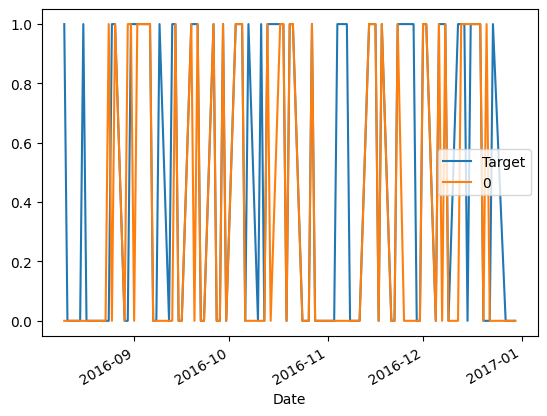

In [ ]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.515504
0    0.484496
Name: Target, dtype: float64